# Business Objective:
Forecast daily food delivery order volume using historical order data to help operations teams plan delivery capacity, manage peak demand, and optimize resources.

# STEP 1: Import libraries

In [7]:
# for data handling
import pandas as pd
import numpy as np


# for data Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# for Evaluation
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


#  for Visualization
import matplotlib.pyplot as plt

# We mainly use orders.csv for demand forecasting.
Other files can be used later for enrichment.

# STEP 2: Load datasets

In [8]:
orders = pd.read_csv("orders.csv")
restaurants = pd.read_csv("restaurants.csv")
deliveries = pd.read_csv("deliveries.csv")

In [9]:
orders.head()

,order_id,customer_id,restaurant_id,order_date,delivery_time,status,total_amount,payment_mode,discount_applied,feedback_rating
0,1,114,73,2024-07-01 17:42:02,2024-07-01 18:49:02,Delivered,3098.28,Cash,33.25,1.41
1,2,402,68,2025-05-31 07:42:05,2025-05-31 08:44:05,Cancelled,83.87,Credit Card,37.85,1.21
2,3,46,30,2024-10-20 00:02:40,2024-10-20 01:28:40,Pending,4250.01,Credit Card,33.45,0.67
3,4,235,181,2023-11-13 12:48:27,2023-11-13 14:10:27,Delivered,1180.55,Cash,23.01,3.16
4,5,445,10,2024-07-24 13:45:42,2024-07-24 15:09:42,Delivered,4741.26,UPI,36.78,3.58


In [10]:
restaurants.head()

,restaurant_id,name,cuisine_type,location,owner_name,average_delivery_time,contact_number,rating,total_orders,is_active
0,1,Spicy Lounge (Desserts),Continental,"Uppal Circle, Kodambakkam, Chennai, Tamil Nadu...",Hemani Kade,35,8835996124,0.19,1744,1
1,2,Spicy Hut (Korean),Continental,"Sanghvi Chowk, Tambaram, Chennai, Tamil Nadu, ...",Dakshesh Prabhakar,109,757667208,4.11,404,0
2,3,Delicious Eatery (Seafood),North Indian,"Barad Marg, Adyar, Chennai, Tamil Nadu, India ...",Chakrika Mitter,48,916061322981,0.74,2669,1
3,4,Flavors of House (Kerala),Chinese,"Hans Ganj, Tambaram, Chennai, Tamil Nadu, Indi...",Meghana Hayer,76,848447327,1.59,902,0
4,5,Classic Bistro (Kerala),Italian,"Saxena Circle, Perungudi, Chennai, Tamil Nadu,...",Tanmayi Chhabra,116,6983521418,0.71,790,1


In [11]:
deliveries.head()

,delivery_id,order_id,delivery_person_id,delivery_status,distance,delivery_time,estimated_time,delivery_fee,vehicle_type
0,1,1418,104,On the way,40.64,34,58,41.05,Electric Bike
1,2,713,400,Delivered,16.53,18,58,9.25,Bike
2,3,264,314,Cancelled,9.98,37,65,13.59,Electric Scooter
3,4,1015,498,Delivered,30.36,27,69,40.05,Electric Bike
4,5,1198,45,Cancelled,35.15,26,32,7.75,Electric Scooter


In [12]:
orders.describe()

,order_id,customer_id,restaurant_id,total_amount,discount_applied,feedback_rating
count,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,254.54800,99.471333,2431.300173,25.669740,2.496653
std,433.157015,144.57241,57.862376,1433.241298,14.437875,1.459742
min,1.000000,1.00000,1.000000,9.080000,0.090000,0.000000
25%,375.750000,130.75000,48.000000,1174.985000,12.882500,1.210000
50%,750.500000,252.00000,101.000000,2394.385000,26.270000,2.550000
75%,1125.250000,384.00000,150.000000,3630.220000,38.190000,3.732500
max,1500.000000,500.00000,200.000000,4986.070000,50.000000,4.990000


In [13]:
restaurants.describe()

,restaurant_id,average_delivery_time,contact_number,rating,total_orders,is_active
count,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000
mean,100.500000,61.970000,2.868108e+11,2.452600,1580.635000,0.540000
std,57.879185,34.601088,4.220732e+11,1.410603,838.627421,0.499648
min,1.000000,0.000000,1.446491e+07,0.000000,2.000000,0.000000
25%,50.750000,31.000000,3.105588e+09,1.207500,826.750000,0.000000
50%,100.500000,64.000000,6.751888e+09,2.555000,1618.000000,1.000000
75%,150.250000,92.250000,9.121789e+11,3.625000,2266.750000,1.000000
max,200.000000,120.000000,9.197178e+11,5.000000,3000.000000,1.000000


In [14]:
deliveries.describe()

,delivery_id,order_id,delivery_person_id,distance,delivery_time,estimated_time,delivery_fee
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,755.493333,246.448000,25.679400,37.479333,45.130667,24.909407
std,433.157015,437.354919,144.322051,14.253613,13.087542,14.456264,14.480956
min,1.000000,1.000000,1.000000,1.000000,15.000000,20.000000,0.000000
25%,375.750000,370.000000,120.000000,12.885000,26.000000,33.000000,12.507500
50%,750.500000,749.500000,247.500000,25.980000,38.000000,45.000000,24.280000
75%,1125.250000,1144.000000,373.250000,38.062500,48.000000,57.000000,37.620000
max,1500.000000,1500.000000,500.000000,49.970000,60.000000,70.000000,49.980000


# STEP 3: Data cleaning & filtering

In [15]:
# Converting order_date to datetime
orders['order_date'] = pd.to_datetime(orders['order_date'])

In [16]:
# Keep only successfully completed orders
orders = orders[orders['status'].isin(['Delivered', 'Completed'])]

In [18]:
orders

,order_id,customer_id,restaurant_id,order_date,delivery_time,status,total_amount,payment_mode,discount_applied,feedback_rating
0,1,114,73,2024-07-01 17:42:02,2024-07-01 18:49:02,Delivered,3098.28,Cash,33.25,1.41
3,4,235,181,2023-11-13 12:48:27,2023-11-13 14:10:27,Delivered,1180.55,Cash,23.01,3.16
4,5,445,10,2024-07-24 13:45:42,2024-07-24 15:09:42,Delivered,4741.26,UPI,36.78,3.58
6,7,98,175,2024-12-01 22:02:51,2024-12-01 22:50:51,Delivered,4189.78,UPI,16.41,1.94
9,10,271,196,2025-02-07 16:13:38,2025-02-07 16:58:38,Delivered,658.37,UPI,12.83,4.73
...,...,...,...,...,...,...,...,...,...,...
1482,1483,482,85,2025-01-08 19:13:15,2025-01-08 20:02:15,Delivered,3282.53,Cash,34.45,0.65
1484,1485,388,199,2024-07-27 23:46:06,2024-07-28 00:30:06,Delivered,4768.31,Credit Card,29.40,4.98
1488,1489,24,174,2024-07-02 22:41:00,2024-07-02 23:14:00,Delivered,2415.01,UPI,43.62,0.79
1490,1491,274,87,2024-04-20 14:12:48,2024-04-20 15:17:48,Delivered,3293.43,Credit Card,35.39,4.64


In [19]:
# Check date range
orders['order_date'].min(), orders['order_date'].max()

(Timestamp('2023-07-13 21:26:04'), Timestamp('2025-07-12 04:38:07'))

In [20]:
orders

,order_id,customer_id,restaurant_id,order_date,delivery_time,status,total_amount,payment_mode,discount_applied,feedback_rating
0,1,114,73,2024-07-01 17:42:02,2024-07-01 18:49:02,Delivered,3098.28,Cash,33.25,1.41
3,4,235,181,2023-11-13 12:48:27,2023-11-13 14:10:27,Delivered,1180.55,Cash,23.01,3.16
4,5,445,10,2024-07-24 13:45:42,2024-07-24 15:09:42,Delivered,4741.26,UPI,36.78,3.58
6,7,98,175,2024-12-01 22:02:51,2024-12-01 22:50:51,Delivered,4189.78,UPI,16.41,1.94
9,10,271,196,2025-02-07 16:13:38,2025-02-07 16:58:38,Delivered,658.37,UPI,12.83,4.73
...,...,...,...,...,...,...,...,...,...,...
1482,1483,482,85,2025-01-08 19:13:15,2025-01-08 20:02:15,Delivered,3282.53,Cash,34.45,0.65
1484,1485,388,199,2024-07-27 23:46:06,2024-07-28 00:30:06,Delivered,4768.31,Credit Card,29.40,4.98
1488,1489,24,174,2024-07-02 22:41:00,2024-07-02 23:14:00,Delivered,2415.01,UPI,43.62,0.79
1490,1491,274,87,2024-04-20 14:12:48,2024-04-20 15:17:48,Delivered,3293.43,Credit Card,35.39,4.64


# Why:
Forecasting demand based on failed or cancelled orders gives misleading signals.

# STEP 4: Create daily aggregation

In [23]:
# Aggregate orders at daily level

daily_orders = (
  orders. groupby(orders['order_date'].dt.date).agg(
        total_orders=('order_id', 'count'),
        avg_order_value=('total_amount', 'mean'),
        discount_ratio=('discount_applied', 'mean')
  )
    .reset_index()
)

In [24]:
# Rename and sort
daily_orders.rename(columns={'order_date': 'date'}, inplace=True)
daily_orders['date'] = pd.to_datetime(daily_orders['date'])
daily_orders = daily_orders.sort_values('date')

In [27]:
daily_orders.head()

,date,total_orders,avg_order_value,discount_ratio
0,2023-07-13,1,3110.820,19.210
1,2023-07-15,1,292.630,49.020
2,2023-07-16,2,2892.535,27.985
3,2023-07-19,2,1074.925,27.555
4,2023-07-21,1,2178.410,44.050


# Why this matters:
This transforms raw transactional data into a forecast-ready time series.

# STEP 5: Time-based features

In [28]:
# Calendar features
daily_orders['day_of_week'] = daily_orders['date'].dt.dayofweek

In [29]:
daily_orders['is_weekend'] = daily_orders['day_of_week'].isin([5, 6]).astype(int)

In [30]:
daily_orders['week_of_month'] = daily_orders['date'].dt.day.apply(lambda x: (x - 1) // 7 + 1)

In [31]:
daily_orders['month'] = daily_orders['date'].dt.month

# Why:
Food delivery demand is strongly influenced by weekends and weekly cycles.

# STEP 6: Lag features

In [32]:
# Lagged order volume
daily_orders['orders_lag_1'] = daily_orders['total_orders'].shift(1)

In [33]:
daily_orders['orders_lag_7'] = daily_orders['total_orders'].shift(7)

In [34]:
daily_orders['orders_lag_14'] = daily_orders['total_orders'].shift(14)

# Why:
Yesterday’s and last week’s demand is often the strongest predictor of today.

# STEP 7: Rolling window features

In [35]:
# Rolling averages to capture trend
daily_orders['rolling_mean_7'] = daily_orders['total_orders'].rolling(7).mean()

In [36]:
daily_orders['rolling_mean_14'] = daily_orders['total_orders'].rolling(14).mean()

# Why:
Smooths short-term noise and captures medium-term trends.

# STEP 8: Handle missing values from lag creation

In [37]:
# Drop rows with NaN values caused by lag/rolling features
daily_orders = daily_orders.dropna().reset_index(drop=True)

In [38]:
daily_orders

,date,total_orders,avg_order_value,discount_ratio,day_of_week,is_weekend,week_of_month,month,orders_lag_1,orders_lag_7,orders_lag_14,rolling_mean_7,rolling_mean_14
0,2023-08-03,2,3942.410000,25.525000,3,0,1,8,1.0,1.0,1.0,1.285714,1.285714
1,2023-08-04,1,1881.790000,0.850000,4,0,1,8,2.0,1.0,1.0,1.285714,1.285714
2,2023-08-06,3,3418.176667,29.183333,6,1,1,8,1.0,1.0,2.0,1.571429,1.357143
3,2023-08-07,3,983.050000,18.580000,0,0,1,8,3.0,2.0,2.0,1.714286,1.428571
4,2023-08-08,1,4154.030000,44.800000,1,0,2,8,3.0,1.0,1.0,1.714286,1.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,2025-07-05,1,4639.260000,33.400000,5,1,1,7,2.0,2.0,2.0,1.142857,1.142857
351,2025-07-07,1,902.050000,21.070000,0,0,1,7,1.0,1.0,1.0,1.142857,1.142857
352,2025-07-09,3,3780.066667,42.660000,2,0,2,7,1.0,1.0,1.0,1.428571,1.285714
353,2025-07-11,1,2889.000000,45.680000,4,0,2,7,3.0,1.0,1.0,1.428571,1.285714


# STEP 9: Train–test split

In [39]:
# Split based on time (80% train, 20% test)
split_date = daily_orders['date'].quantile(0.8)

In [40]:
train = daily_orders[daily_orders['date'] <= split_date]
test = daily_orders[daily_orders['date'] > split_date]

In [41]:
# Features and target
X_train = train.drop(columns=['date', 'total_orders'])
y_train = train['total_orders']

In [42]:
X_test = test.drop(columns=['date', 'total_orders'])
y_test = test['total_orders']

# Random split would cause data leakage in time-series problems.

# STEP 10: Baseline model

In [43]:
# Baseline: previous day's orders
baseline_preds = test['orders_lag_1']

In [44]:
baseline_mape = mean_absolute_percentage_error(y_test, baseline_preds)
baseline_rmse = mean_squared_error(y_test, baseline_preds, squared=False)

In [45]:
print("Baseline MAPE:", baseline_mape)

Baseline MAPE: 0.33098591549295775


In [46]:
print("Baseline RMSE:", baseline_rmse)

Baseline RMSE: 0.7782247765375383


# Any ML model must beat this to justify complexity.

# STEP 11: Linear Regression model

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
lr_preds = lr.predict(X_test)

In [49]:
print("LR MAPE:", mean_absolute_percentage_error(y_test, lr_preds))

LR MAPE: 0.27942786782868595


In [50]:
print("LR RMSE:", mean_squared_error(y_test, lr_preds, squared=False))

LR RMSE: 0.5313021400487025


# Acts as an interpretable benchmark.

# STEP 12: Random Forest model

In [51]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

In [52]:
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [53]:
print("RF MAPE:", mean_absolute_percentage_error(y_test, rf_preds))

RF MAPE: 0.25915980493917495


In [54]:
print("RF RMSE:", mean_squared_error(y_test, rf_preds, squared=False))

RF RMSE: 0.4845089692263422


# Captures non-linear interactions between demand drivers.

# STEP 13: Feature importance

In [55]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.head(10)

avg_order_value    0.254609
discount_ratio     0.205159
rolling_mean_7     0.191370
rolling_mean_14    0.062961
day_of_week        0.062802
month              0.058109
week_of_month      0.051813
orders_lag_1       0.042258
orders_lag_7       0.035693
orders_lag_14      0.027982
dtype: float64

# STEP 14: Actual vs Predicted visualization

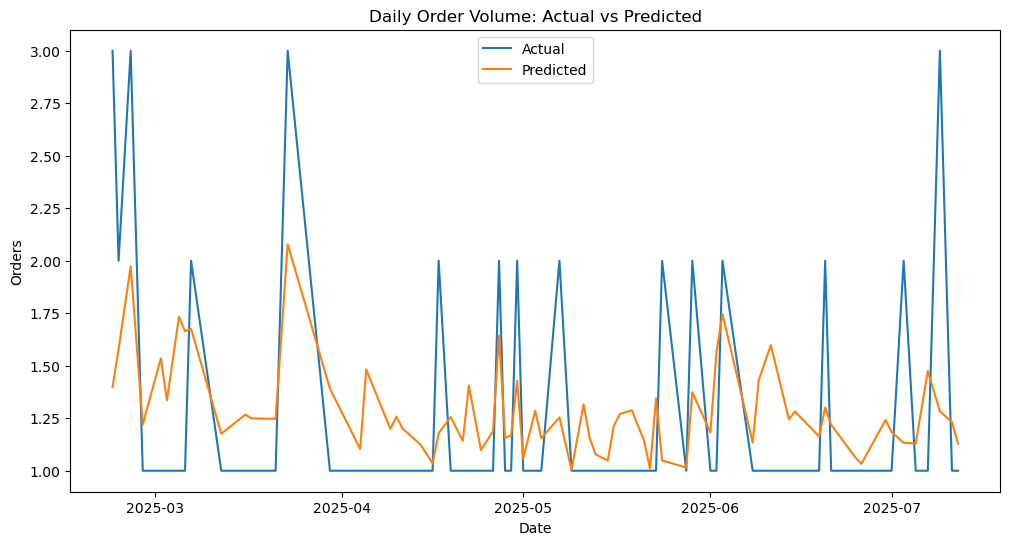

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(test['date'], y_test.values, label='Actual')
plt.plot(test['date'], rf_preds, label='Predicted')
plt.legend()
plt.title("Daily Order Volume: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Orders")
plt.show()

# Conclusion

Built a time-series demand forecasting model using historical food delivery data.
Engineered lag, rolling, and calendar-based features and evaluated models using MAPE.
Random Forest reduced forecasting error by X% compared to a naive baseline, enabling better delivery capacity planning.